In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [ ]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

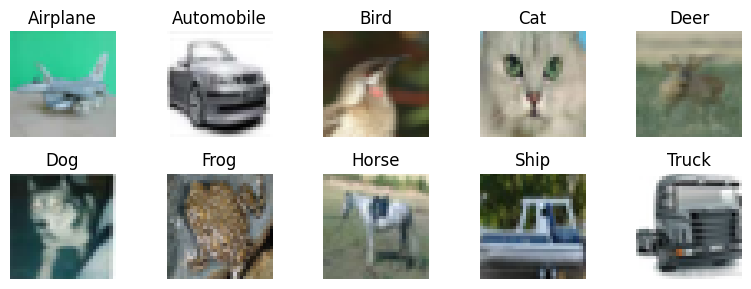

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
x_train = (x_train).astype(np.float32) / 255
x_val = (x_val).astype(np.float32) / 255


# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [ ]:
##################################################
inputs = keras.Input(shape=(x_train[0].shape))
layer1 = Conv2D(128, kernel_size=(3,3), activation='relu')(inputs)
layer2 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer1)
layer3 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer2)
layer4 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer3)
layer5 = MaxPool2D()(layer4)
layer6 = Flatten()(layer5)
outputs = Dense(num_classes, activation='softmax')(layer6)
model = keras.Model(inputs=inputs, outputs=outputs)
##################################################

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                             

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [ ]:
##################################################
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [ ]:
##################################################
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_val,y_val), shuffle=True)
##################################################

Epoch 1/10
500/500 [==============================] - 19s 34ms/step - loss: 1.4735 - accuracy: 0.4727 - val_loss: 1.1714 - val_accuracy: 0.5902
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 1.0492 - accuracy: 0.6335 - val_loss: 0.9852 - val_accuracy: 0.6556
Epoch 3/10
500/500 [==============================] - 17s 35ms/step - loss: 0.8667 - accuracy: 0.7014 - val_loss: 0.8972 - val_accuracy: 0.6922
Epoch 4/10
500/500 [==============================] - 17s 34ms/step - loss: 0.7453 - accuracy: 0.7439 - val_loss: 0.8995 - val_accuracy: 0.6956
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.6494 - accuracy: 0.7755 - val_loss: 0.8332 - val_accuracy: 0.7252
Epoch 6/10
500/500 [==============================] - 17s 34ms/step - loss: 0.5640 - accuracy: 0.8051 - val_loss: 0.8841 - val_accuracy: 0.7180
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.4720 - accuracy: 0.8350 - val_loss: 0.9383 - val_accuracy:

This function plots the `loss` and `accuracy` of your model by the model's history.

In [ ]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

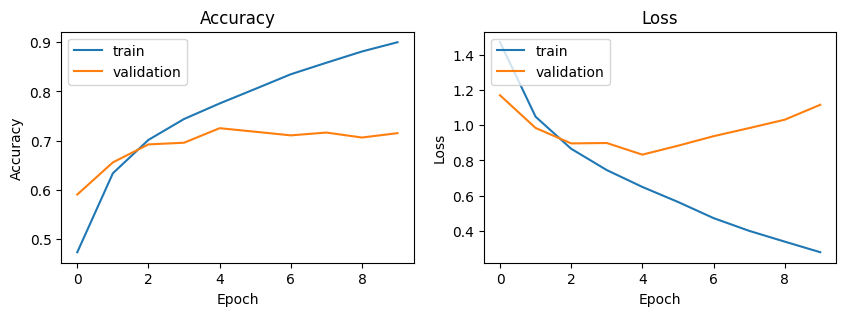

In [ ]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [ ]:
##################################################
inputs = keras.Input(shape=(x_train[0].shape))
layer1 = Conv2D(128, kernel_size=(3,3), activation='relu')(inputs)
layer2 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer1)
layer3 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer2)
layer4 = Conv2D(128, kernel_size=(3,3), activation='relu')(layer3)
layer5 = MaxPool2D()(layer4)
layer6 = Flatten()(layer5)
outputs = Dense(num_classes, activation='softmax')(layer6)
model = keras.Model(inputs=inputs, outputs=outputs)
##################################################

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 26, 128)       147584    
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                           

In [ ]:
##################################################
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##################################################

In [ ]:
##################################################
datagen = ImageDataGenerator(rotation_range=90, horizontal_flip=True, vertical_flip=True)
batch_size = 100
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=10, # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size, # number of images comprising of one epoch
                    validation_data=(x_val, y_val), # data for validation
                    validation_steps=x_val.shape[0]//batch_size)
##################################################

Epoch 1/10
500/500 [==============================] - 34s 65ms/step - loss: 1.8618 - accuracy: 0.3189 - val_loss: 1.7206 - val_accuracy: 0.3755
Epoch 2/10
500/500 [==============================] - 30s 60ms/step - loss: 1.6721 - accuracy: 0.3976 - val_loss: 1.6139 - val_accuracy: 0.4172
Epoch 3/10
500/500 [==============================] - 32s 64ms/step - loss: 1.5790 - accuracy: 0.4317 - val_loss: 1.5037 - val_accuracy: 0.4584
Epoch 4/10
500/500 [==============================] - 31s 62ms/step - loss: 1.5176 - accuracy: 0.4555 - val_loss: 1.4589 - val_accuracy: 0.4781
Epoch 5/10
500/500 [==============================] - 30s 59ms/step - loss: 1.4616 - accuracy: 0.4761 - val_loss: 1.4125 - val_accuracy: 0.4952
Epoch 6/10
500/500 [==============================] - 30s 60ms/step - loss: 1.4218 - accuracy: 0.4960 - val_loss: 1.3747 - val_accuracy: 0.5134
Epoch 7/10
500/500 [==============================] - 30s 60ms/step - loss: 1.3816 - accuracy: 0.5081 - val_loss: 1.3259 - val_accuracy:

Let's see your model performance with augmentation.

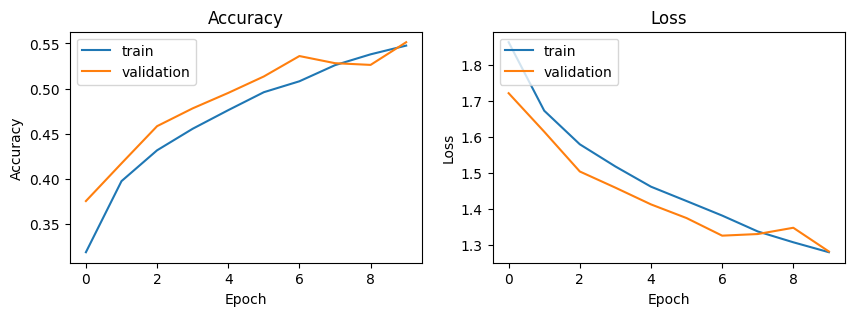

In [ ]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [ ]:
x_train = keras.applications.resnet50.preprocess_input(x_train)
x_val = keras.applications.resnet50.preprocess_input(x_val)
inputs = keras.Input(shape=(x_train[0].shape))
base_model = ResNet50(include_top=False, weights='imagenet')
resize_layer = tf.keras.layers.Resizing(
    224, 224, interpolation="bicubic", crop_to_aspect_ratio=False
)
# add custom head
x = resize_layer(inputs)
x = base_model(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# define new model
model = keras.Model(inputs=inputs, outputs=x)

# freeze base model layers
for layer in base_model.layers:
    layer.trainable = False
model.summary()
# compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1003530   
                                                                 
Total params: 24,591,242
Trainable params: 1,003,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train, epochs=10, batch_size=64, validation_data=(x_val,y_val), shuffle=True)

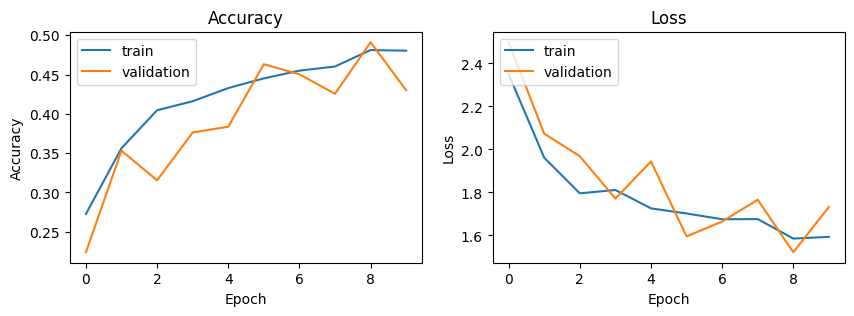

In [ ]:
plot_acc_loss(history)

## Use only the first three blocks (`extra bonus`)

In [ ]:
x_train = keras.applications.resnet50.preprocess_input(x_train)
x_val = keras.applications.resnet50.preprocess_input(x_val)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
# add custom head
x = base_model.output
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# define new model
model = keras.Model(inputs=base_model.input, outputs=x)

# freeze base model first three blocks
i = 0
for layer in base_model.layers:
  if(i < 30):
    layer.trainable = False
  else:
    break
model.summary(expand_nested=True)
# compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_16[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
history = model.fit(x_train,y_train, epochs=10, batch_size=64, validation_data=(x_val,y_val), shuffle=True)

Epoch 1/10
782/782 [==============================] - 18s 18ms/step - loss: 2.1412 - accuracy: 0.2171 - val_loss: 2.0522 - val_accuracy: 0.2518
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 1.9987 - accuracy: 0.2844 - val_loss: 1.9741 - val_accuracy: 0.3052
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 1.9546 - accuracy: 0.2985 - val_loss: 1.9438 - val_accuracy: 0.2985
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.9223 - accuracy: 0.3121 - val_loss: 1.8885 - val_accuracy: 0.3307
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 1.9020 - accuracy: 0.3187 - val_loss: 1.8842 - val_accuracy: 0.3292
Epoch 6/10
782/782 [==============================] - 12s 16ms/step - loss: 1.8818 - accuracy: 0.3301 - val_loss: 1.8643 - val_accuracy: 0.3399
Epoch 7/10
782/782 [==============================] - 12s 16ms/step - loss: 1.8687 - accuracy: 0.3334 - val_loss: 1.8384 - val_accuracy:

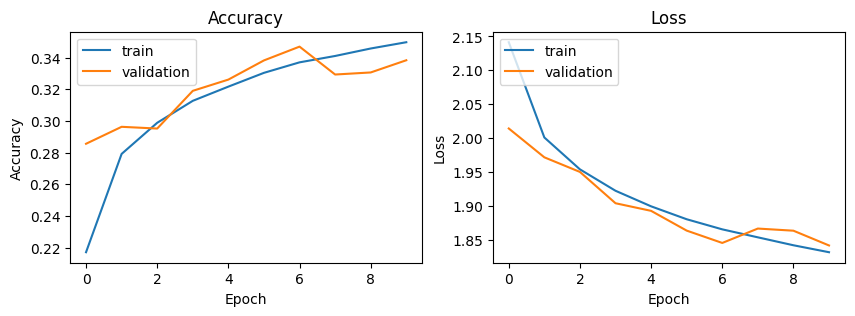

In [ ]:
plot_acc_loss(history)